# Project Report

**IMPORTANT !!** Since the final product is an application, it is important to note that the way some results are displayed in this notebook is NOT the same as in the app ! Nevertheless, the same packages, data and functions are used.

In [28]:
#importing packages and functions
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import numpy
import stmol
import sys
from IPython.display import Image
sys.path.append('../Complexify')
from module_3D import display_molecule_from_xyz, smi2conf, MolTo3DView

Most of this project's time was allocated to restructuring the data we needed into a format where we could access it easily in order to use it in the application. The reason this took so much time is because the files were huge, going from 30 000 to 1 million lines, with over 60 000 separate complexes that each had separate 3D coordinates for each atom. Certain complexes have over 100 atoms, which explains the length of most of the .xyz files which had to be extracted and correctly parsed.

## Motivation

We wanted to create a tool that would not only be useful to us and others, but would also be pleasing and easy to manipulate for the user. The idea to focus on coordination complexes originated from the fact we have two courses that involve them (*Organometallic Chemistry* and *Coordination Chemistry*) which were our introduction to these compounds and made us want to look into them in more detail. When making our pitch to the TAs, we were told that Sarina Kopf was currently working with a database of such coordination compounds, and it is while discussing with her that we decided to change our project from an oxidation/charge/valence electron calculator (which are all information that are mostly already available in the databases) into an application to navigate the immense amount of information provided by the tmqm, tmQMg and tmQMg_L repositories. 

We profited from the extensive examples and resources on the usage of the pandas, numpy, py3Dmol and streamlit packages provided during the course in order to lead our idea to completion. While we struggled on some aspects (mostly data manipulation with initially clumsy and slow loops), we overall enjoyed using these tools to produce something that we hope will be useful in the future.

You might have noticed that the Notebooks file contains more than just this one notebook. They show how we conducted our data analysis in more detail than what will be discussed in this report in order to not be exhaustive here, so please treat them as an Appendix. 

## 3D visualisation and presentation of function built to display them

Thankfully, py3Dmol recognizes .xyz files as a format it can create 3D visuals out of. Here is an example of what the complexes look like on the application:

In [20]:
(display_molecule_from_xyz(rf"..\Created Data\tmQMg_xyz\TUTCAM.xyz")).show() #function written for the project to set the style of the 3D object.
print("This is a complex called TUTCAM.")

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

This is a complex called TUTCAM.


While the ligands also have their separate .xyz files, before diving into them we devised a way to visualize them from their SMILES, which are simple strings provided in the data. Here is an example of the display one can get if they wanted more information on a specific ligand:

In [19]:
ligand = MolTo3DView(smi2conf('[H]O[H]'), size=(600, 300))
print('Can you guess what this is ?')
ligand


Can you guess what this is ?


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Initially, we were worried the 3D visualisation would be hard as .xyz files were something we had never worked with before, however they turned out to be relatively easy to implement once we understood how py3Dmol went through them. It was the final touch to our application, we thought it was visually pleasing and had fun by adding a random complex to the start of the page to catch the user's interest.

*Please refer to the ``module_3D.py`` module to find the expressions of the demonstrated functions. They were tested with the ``tests.py`` code present in the repository.*

## Creation of csv files for the application

We quickly noticed that the raw data from the tmqm, tmQMg and tmQMg_L repository had some informations we did not desire in the context of this project. For example, here is the ligands_fingerprints.csv file:

In [23]:
print(pd.read_csv('../Raw_Data/ligands_fingerprints.csv',sep=';'))

                name  charge  n_atoms  n_metal_bound  n_dentic_bound  \
0          ligand0-0       0       40              1               1   
1          ligand1-0      -1        1              1               1   
2          ligand2-0      -1       21              5               0   
3          ligand3-0      -1        1              1               1   
4          ligand4-0       0        2              1               1   
...              ...     ...      ...            ...             ...   
29726  ligand31886-0      -1       19              5               0   
29727  ligand31887-0      -1       27              2               2   
29728  ligand31888-0       0       34              2               2   
29729  ligand31890-0      -1       19              3               3   
29730  ligand31891-0      -2       28              2               2   

       n_haptic_bound  is_alternative_charge   H  B   C  ...  haptic_O  \
0                   0                      0  18  0  20  ... 

Alternative charges and denticity/hapticity is not something we wanted to specifically point out to the user on the application. Thus, we made the choice to filter them out while constructing the csv files that would be used by the application. This also allows faster parsing and thus faster display of results.

However, this file does not have all the data we would like for the ligands. We had to extract them across a few raw files, namely ligands_fingerprint.csv, ligands_misc_info.csv and ligands_xyzs.xyz. See the second stated file below:

In [24]:
print(pd.read_csv('../Raw_Data/ligands_misc_info.csv',sep=';'))

                name                                             smiles  \
0          ligand0-0  N1(C([H])([H])c2c3c(c([H])c(c(c3[H])[H])[H])c(...   
1          ligand1-0                                               [Cl]   
2          ligand2-0  [C]1(C([H])(C(C([H])([H])[C](C(C([C]1[H])([H])...   
3          ligand3-0                                               [Br]   
4          ligand4-0                                              O=[C]   
...              ...                                                ...   
29726  ligand31886-0  C1(=C(C(=C([C]1[H])[H])[H])c1nc([H])c(c(c1[H])...   
29727  ligand31887-0  s1c(c(c(c1[H])[H])[H])C(=O)[N]/N=C(/[H])\c1nc2...   
29728  ligand31888-0  n1n(c(c(c1[H])[H])[H])C(N(c1c([H])c([H])c(c(c1...   
29729  ligand31890-0    Brc1n(nc(c1Br)Br)[B]([H])([H])n1nc(c(c1Br)Br)Br   
29730  ligand31891-0  [P](c1c(c(c(c(c1[H])[H])[H])[H])[H])([C]([H])[...   

      stoichiometry  occurrence  \
0          C20H18N2           4   
1                Cl       178

Combining columns that interested us was the easy part. What took long was figuring out a time-efficient way of parsing the long strings containing the list of complexes a single ligand appears in. For common ligands like Cl, that list can contain up to 18 000 complexes all presented with extra subgraph information and labelling. At first, we tried to get through it with simple embedded loops and it took over 10 hours to run a single cell !!! *(aside; my computer actually blue screened while trying to get through one of those cells. For the longest time, I thought the famous 'blue screen of death' was a legend to scare people off. It's not.)*

Through research of various python libraries and pandas functionalities we learned new techniques, namely vectorized operations, and it allowed us to reduce these operations from 10 hours to 10 minutes. Here is an example of the code you may find in detail and run in the Complex_and_Ligands_data.ipynb notebook in the Notebooks folder. It would not work if you ran it on this notebook as we have not defined ``df_ligands1`` and ``tot_complex``.

In [ ]:
#JUST AN EXAMPLE, DO NOT RUN
#tot_complex: list of the the IDs of all complexes
#df_ligands1: the dataframe containing all the information we have on ligands that we are trying to complete

#completing the ligand dataframe
for complex in tot_complex:
    mask=df_ligands1['parent_metal_occurrences'].str.contains(complex)
    counts=df_ligands1.loc[mask,"parent_metal_occurrences"].str.count(complex)
    df_ligands.loc[mask,"Complex in which they appear and number of appearances"]=df_ligands.loc[mask,"Complex in which they appear and number of appearances"].apply(lambda x:{**x, f"{complex}":counts.iloc[0]})


Here is what the final Ligands_info.csv file looks like, it was fully prepared by us and is used in the application.

In [26]:
print(pd.read_csv('../Created Data/Ligands_info.csv',sep=','))

       Unnamed: 0.1  Unnamed: 0             ID  \
0                 0           0      ligand0-0   
1                 1           1      ligand1-0   
2                 2           2      ligand2-0   
3                 3           3      ligand3-0   
4                 4           4      ligand4-0   
...             ...         ...            ...   
29726         29726       29726  ligand31886-0   
29727         29727       29727  ligand31887-0   
29728         29728       29728  ligand31888-0   
29729         29729       29729  ligand31890-0   
29730         29730       29730  ligand31891-0   

                                                  Smiles Stoichiometry  \
0      N1(C([H])([H])c2c3c(c([H])c(c(c3[H])[H])[H])c(...      C20H18N2   
1                                                   [Cl]            Cl   
2      [C]1(C([H])(C(C([H])([H])[C](C(C([C]1[H])([H])...         C8H13   
3                                                   [Br]            Br   
4                            

A similar approach was led to create Complex_info.csv. Please refer to the detailed Complex_and_Ligands_data.ipynb for the exact code.

We noticed while creating the csv files that around 4000 complexes did not appear in the tmQM_X1.xyz.gz and tmQM_X2.xyz.gz files, which made it impossible to find their stoichiometry. While this is not the most important information as we are more interested in the ligands stoichiometry, it would have been possible to parse individual xyz files to construct the complex stoichiometry ourselves. In the end, this was not deemed necessary, but it could be implemented in the future.

Here is how the information is presented in the application. We made it so the user could choose which information they would like to see.

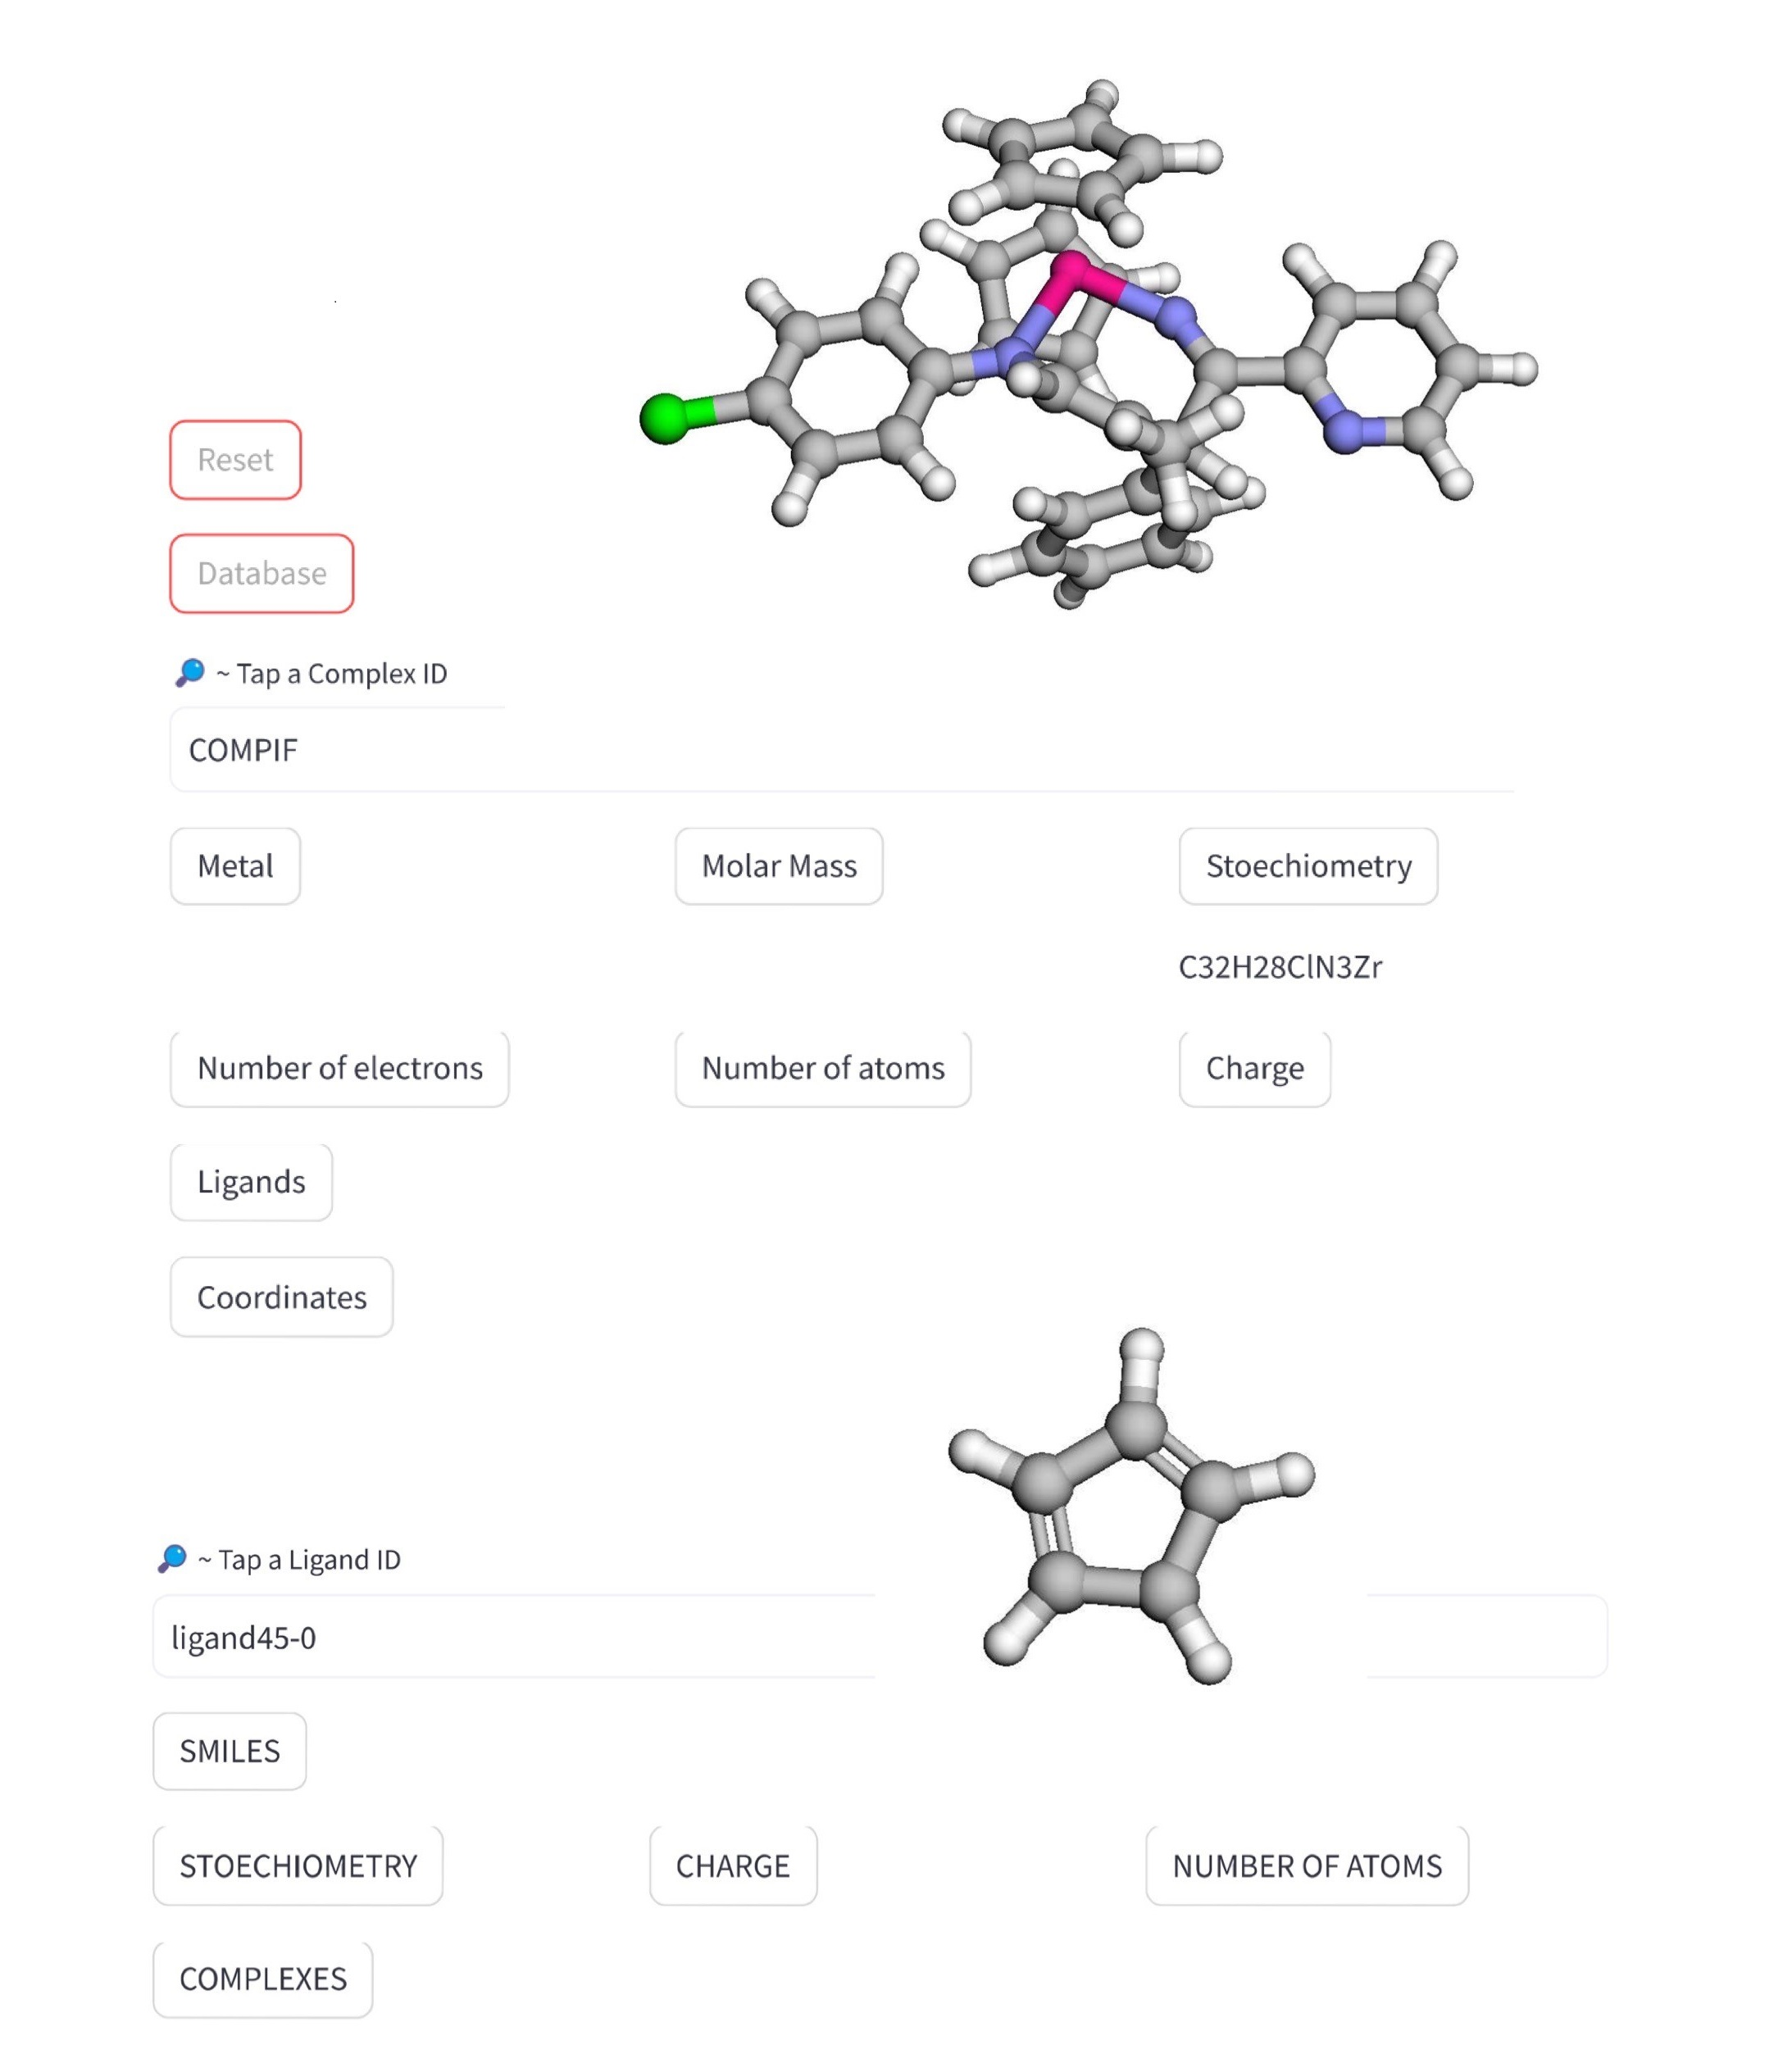

In [29]:
Image(filename='../assets/readmebanner.jpg')

*This is just a screenshot, the molecules are spinning on the web page just like shown in previous cells*

Due to the sheer amount of complexes there are, we made the choice to introduce a scrollable object for the ``Database`` button. The same logic is applied to the ``COMPLEXES`` button.

## Coordinates

When a csv file is converted into a pandas DataFrame, inputs with syntax like [] lists or {} dictionaries that would usually be recognized by python are converted into strings. Thus, the eval method was extensively used in order to use the large objects containing subgraph information and coordinates.

First, here is the final Coordinates_info.csv file used by the application:

In [27]:
print(pd.read_csv('../Created Data/Coordinates_info.csv',sep=','))

      ID COMPLEX                                           LIGAND 1
0         TUTCAM  ['ligand34-0', 'TUTCAM-subgraph-2', 'TUTCAM-su...
1         WAWJEM  ['ligand1-0', 'WAWJEM-subgraph-0', 'ligand2503...
2         KUVSUP  ['ligand1-0', 'KUVSUP-subgraph-0', 'ligand115-...
3         WURFEW  ['ligand1-0', 'WURFEW-subgraph-4', 'WURFEW-sub...
4         YAXBUU  ['ligand4-0', 'YAXBUU-subgraph-0', 'YAXBUU-sub...
...          ...                                                ...
60794     WIBQUU  ['ligand19880-0', 'WIBQUU-subgraph-0', 'WIBQUU...
60795     CERJOY  ['ligand4-0', 'CERJOY-subgraph-0', 'CERJOY-sub...
60796     VUPXIO  ['ligand1-0', 'VUPXIO-subgraph-1', 'VUPXIO-sub...
60797     KONBEW  ['ligand1-0', 'KONBEW-subgraph-1', 'KONBEW-sub...
60798     MORDAY                                                 []

[60799 rows x 2 columns]


Each complex has an associated list which has the ligands and subgraphs they correspond to. To create it, information was extracted from ligands_misc_info.csv previously mentioned (containing which ligand corresponds to which subgraph of a specific complex) and Complex_info.csv (already containing well-formatted dictionnaries of ligands occurences in specific complex). It is figuring out how to appropriately use it in the application that took some time, as its objects were treated as indexes to obtain coordinates in the ligands_xyzs.xyz file. Here is the detail of how we achieved it (again, it will not work if run in this notebook. The code can be found in complexify_app.py)

In [ ]:
#EXAMPLE OF CODE FROM THE APPLICATION, DO NOT RUN

liste = ast.literal_eval(df.iloc[index,1]) #df is the pandas version of the Coordinates_info.csv. the index is the ID of the complex the user input
    
ligands = []
lig = 0
complex_subgraph = []
coord = []

for element in liste: #for an element in the list of the column 'LIGANDS 1' of Coordinates_info.csv corresponding to the researched complex
    if element.startswith('ligand'): 
        ligands.append(element) #get the ligand ID
    elif element.startswith(f'{user_1}-subgraph'): 
        complex_subgraph.append(element) #get the subgraph corresponding to the ligand
                    
for element in liste: 
    for cle in xyzs.keys(): #xyzs is a dictionary where the keys are specific subgraphs of complexes and the elements their respective coordinates
        if cle == element: 
            coord.append(xyzs[cle][22:]) #get the coordinates !
print(coord)
print(complex_subgraph)
print(ligands)

#this part formats it to be displayed on the application
dfxyz = pd.DataFrame({'Ligands subgraph': complex_subgraph,'Coordinates of each atom of the subgraph (xyz)': coord})
dfxyz['Coordinates of each atom of the subgraph (xyz)'] = dfxyz['Coordinates of each atom of the subgraph (xyz)'].str.replace(';', '<br>')
st.write(dfxyz.to_html(escape=False), unsafe_allow_html=True)

It was challenging to keep track of all the different data we had at our disposition. Notice that two different sets of coordinates were given for each complex: the overall coordinates, and the subgraph coordinates of each ligand. By carefully iterating and testing our code, we were able to extract and separate information in order to give the user a comfortable experience.

Here is an example of how a set of specific coordinates looks like when displayed on the application:

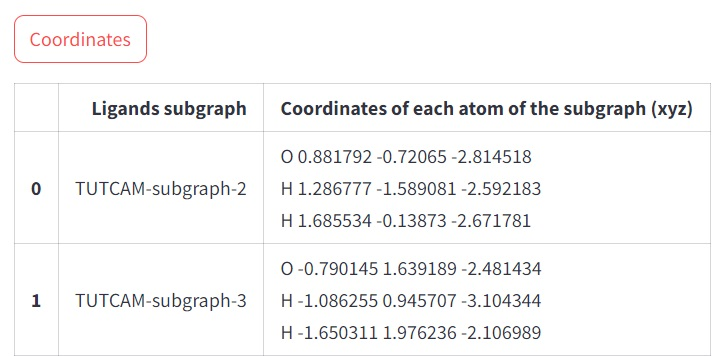

In [30]:
Image(filename='../assets/subgraph_table.jpg')

*Note that it is possible to change the streamlit application to be in night-mode if preferred by clicking on the three dots on the upper right-hand corner of the page and selecting ```Dark```*

## Creation of the package

Due to the fact that the product is an application, we did not have many functions to include in the package. Nevertheless, it was important to create the package in order to have all the prepared files at the ready with pre-set relative paths which would make its use as easy as possible. The user can modify the application to their liking (to an alternative preferred display for example) without having to worry about excessive code muddling the understanding of complexify_app.py. We also took the time to put concise and explicit annotation.

Additionally, we tested relative paths for all the datasets of the package to ensure the user can use the application without having to modify anything in the code. Unfortunately, we have had to add instructions to manually install some datasets directly from github as they were too heavy for us to include them in the initial download. We tried to be as descriptive as possible and included all the specific file paths in the ``README``.

We can confidently say that by following all the instructions, the package should work on both Windows and Mac.

Here is an excerpt from the setup.py file prepared for the package. Again, do not run.

In [ ]:
setup(
    name = "complexify",
    version = "1.0.0",
    author = "Peri Yerlikaya, Shahina Chopra",
    author_email = "peri.yerlikaya@epfl.ch, shahina.chopra@epfl.ch",
    install_requires=[
     "rdkit",
     "streamlit",
     "py3Dmol",
     "numpy",
     "pandas",
     "stmol",
     "matplotlib"
], #etc...

## Conclusion and Acknowledgements

Although we faced hardships during the creation of this project, we are quite proud of the end result. Reloading the application to just watch complexes spin is amusing and gratifying, and one has to admit it is much more pleasant to find information on complexes with this application than by scrolling through enormous databases or trying a ``CTRL F`` uncovering 40 000 mentions all over the page.

We would like to thank Professor Schwaller and the TA team, especially Sarina Kopf, for their patience and guidance throughout this project. We would not have solved some issues we faced as easily as we did if we did not have the exercises and lessons provided by the team. Also, we send our deepest gratitudes and condolences to our friends and families who had to test the project (when it was not working) to help us fix issues that could arise.

We hope you enjoy this application !